# Pasos previos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Churn_Modelling.csv', index_col=0)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
len(df[(df.Balance == 0) & (df.Exited == 0)])

3117

<AxesSubplot:xlabel='Exited', ylabel='count'>

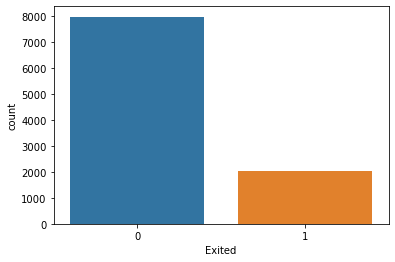

In [11]:
sns.countplot(df.Exited)

In [12]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


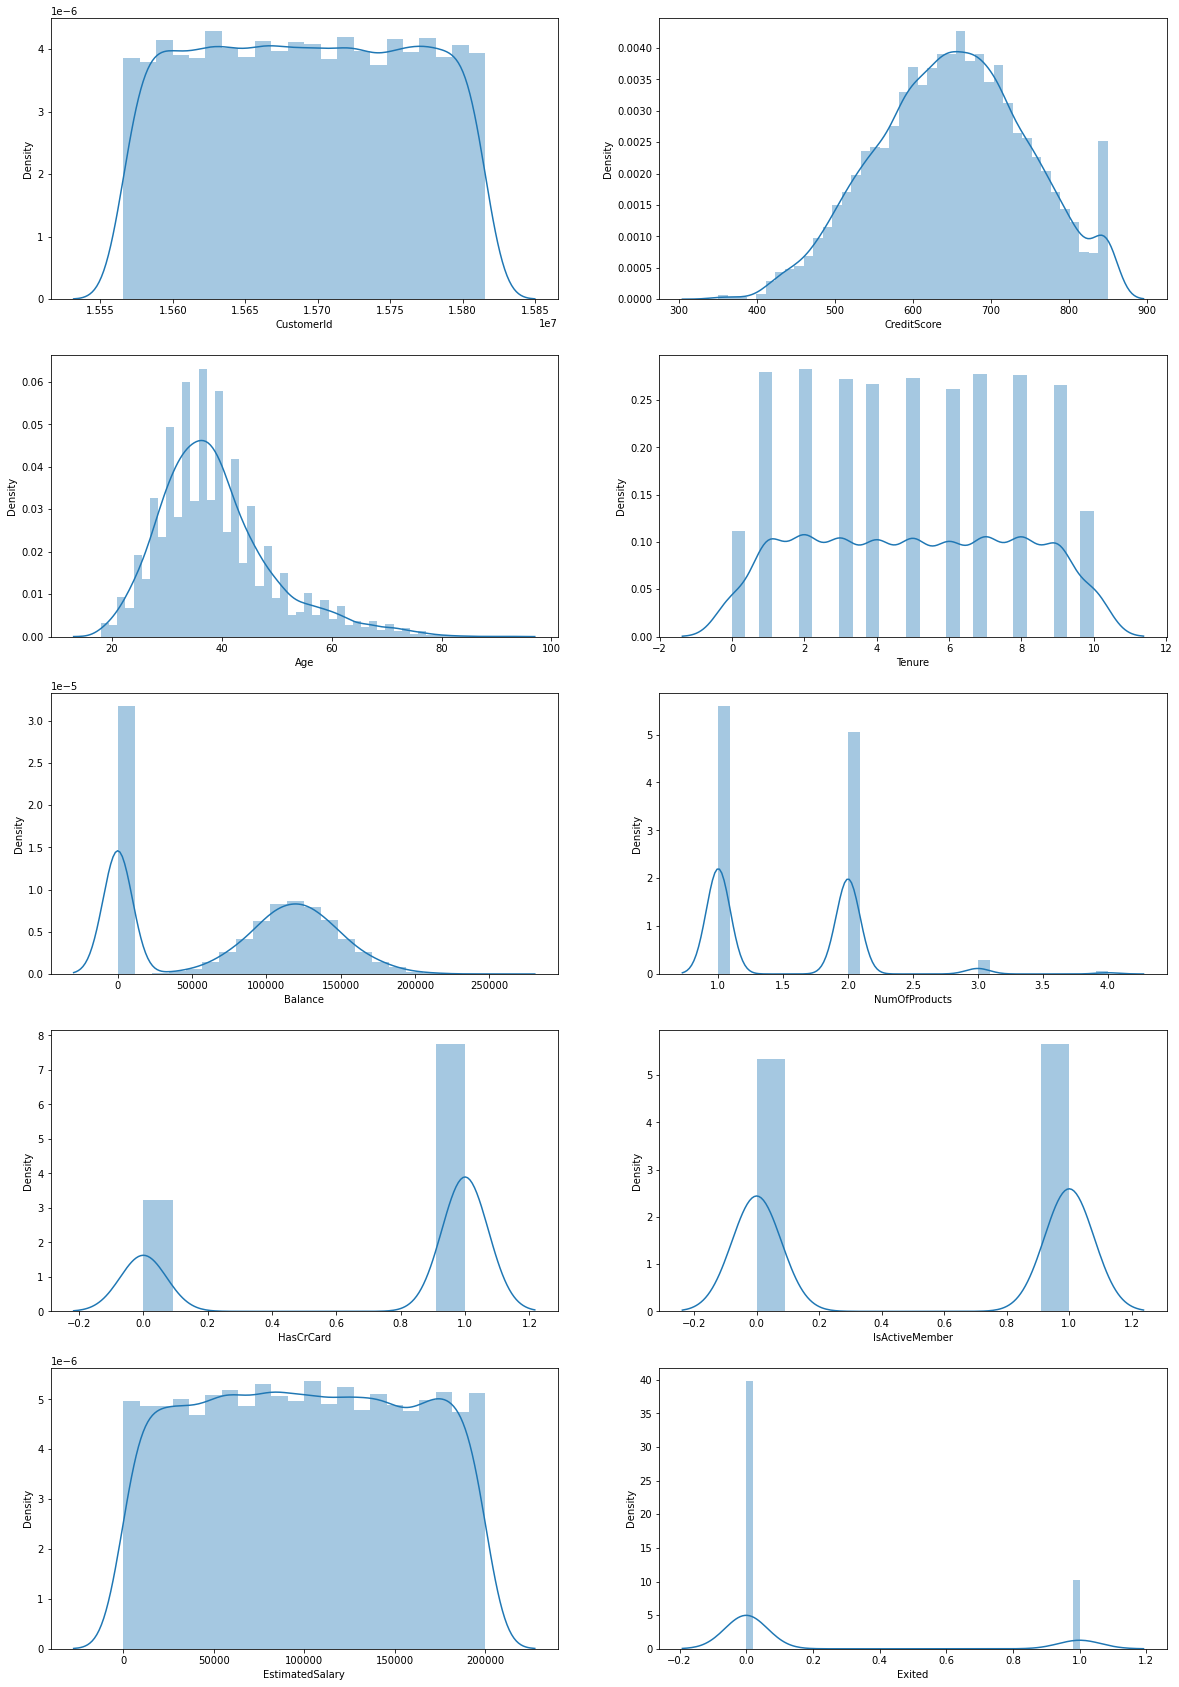

In [15]:
fig, ax = plt.subplots(5,2, figsize=(20,30))
var = df.select_dtypes(include='number').columns.to_list()

for i in range(5):
    for j in range(2):
        x = var.pop(0) # Con .pop() extrae el primer valor de la lista y nos ahorramos otra iteración
        sns.distplot(df[x], ax=ax[i][j])

In [20]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [25]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:>

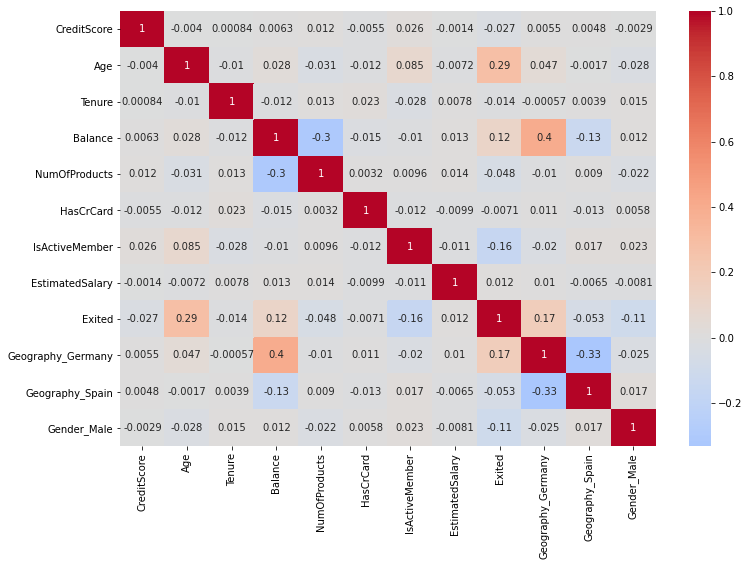

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

In [64]:
# Reordenamos las columnas para que quede 'Exited' al final:

df = df[['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
   'Exited']]

In [120]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited,Labels
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0,1,2
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1,2
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,3
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0


In [121]:
df[df['CreditScore']<0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited,Labels
RowNumber,,,,,,,,,,,,,


# Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [157]:
def logreg(X,y,test_size=0.3):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

## Primera prueba 'naive'

In [144]:
# Le metemos la X,y sin preprocesar para una simple prueba

X = df.drop('Exited', axis=1)
y = df.Exited

In [158]:
logreg(X,y)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



## Preprocesado: escalado de datos

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [192]:
# Creamos una nueva función añadiendo un escalado

def logregscaled(X,y,test_size=0.3, scaler=StandardScaler()):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    model = scaler
    X_scaled = model.fit_transform(X)
    
    X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

### Standard scaler

In [193]:
logregscaled(X,y)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



### Max Abs

In [200]:
logregscaled(X,y,test_size=0.3,  scaler=MaxAbsScaler())

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.57      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.78      3000



### Robust

In [206]:
logregscaled(X,y,test_size=0.3,  scaler=RobustScaler(quantile_range = (0.1, 0.9)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2416
           1       0.36      0.54      0.44       584

    accuracy                           0.73      3000
   macro avg       0.62      0.66      0.63      3000
weighted avg       0.78      0.73      0.74      3000



### Min max

In [207]:
logregscaled(X,y,test_size=0.3,  scaler=MinMaxScaler())

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



# Oversampling

In [209]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, InstanceHardnessThreshold
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [210]:
resampler = SMOTETomek()
X_res, y_res = resampler.fit_resample(X,y)

In [212]:
X.shape

(10000, 11)

In [213]:
y.shape

(10000,)

In [214]:
X_res.shape

(13748, 11)

In [215]:
y_res.shape

(13748,)

In [222]:
len(y[y==0])

7963

In [223]:
len(y[y==1])

2037

In [224]:
len(y_res[y_res==0])

6874

In [225]:
len(y_res[y_res==1])

6874

In [211]:
# StandardScaler()

logregscaled(X_res,y_res)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2045
           1       0.77      0.79      0.78      2080

    accuracy                           0.78      4125
   macro avg       0.78      0.78      0.78      4125
weighted avg       0.78      0.78      0.78      4125



In [226]:
# RobustScaler()

logregscaled(X_res,y_res, scaler=RobustScaler(quantile_range = (0.1, 0.9)))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2045
           1       0.72      0.68      0.70      2080

    accuracy                           0.70      4125
   macro avg       0.71      0.71      0.70      4125
weighted avg       0.71      0.70      0.70      4125



In [227]:
# MaxAbsScaler()

logregscaled(X_res,y_res,test_size=0.3,  scaler=MaxAbsScaler())

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2045
           1       0.77      0.79      0.78      2080

    accuracy                           0.78      4125
   macro avg       0.78      0.78      0.78      4125
weighted avg       0.78      0.78      0.78      4125



In [228]:
# MinMaxScaler

logregscaled(X_res,y_res,test_size=0.3,  scaler=MinMaxScaler())

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2045
           1       0.77      0.79      0.78      2080

    accuracy                           0.78      4125
   macro avg       0.78      0.78      0.78      4125
weighted avg       0.78      0.78      0.78      4125



In [229]:
X_scaled = StandardScaler().fit_transform(X)

In [230]:
X_res, y_res = resampler.fit_resample(X_scaled,y)

In [231]:
logreg(X_res,y_res)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2355
           1       0.71      0.71      0.71      2343

    accuracy                           0.71      4698
   macro avg       0.71      0.71      0.71      4698
weighted avg       0.71      0.71      0.71      4698



In [232]:
# Ampliamos una nueva función añadiendo un escalado

def logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTETomek()):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    resampling_method = resampler
    X_res, y_res = resampling_method.fit_resample(X,y)
    
    model = scaler
    X_scaled = model.fit_transform(X_res)
    
    X_train, X_test, y_train,y_test = train_test_split(X_scaled, y_res, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

In [234]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTETomek())

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2080
           1       0.77      0.79      0.78      2050

    accuracy                           0.78      4130
   macro avg       0.78      0.78      0.78      4130
weighted avg       0.78      0.78      0.78      4130



In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, InstanceHardnessThreshold
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [235]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=BorderlineSMOTE())

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2426
           1       0.77      0.79      0.78      2352

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [236]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTE())

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2426
           1       0.77      0.78      0.78      2352

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [237]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=TomekLinks())

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2097
           1       0.63      0.27      0.38       615

    accuracy                           0.80      2712
   macro avg       0.72      0.61      0.63      2712
weighted avg       0.77      0.80      0.77      2712



#### DUDAS OVERSAMPLING

¿Antes o después de escalar? Mejores resultados haciéndolo antes

# Clustering

## KMeans

In [125]:
from sklearn.cluster import KMeans

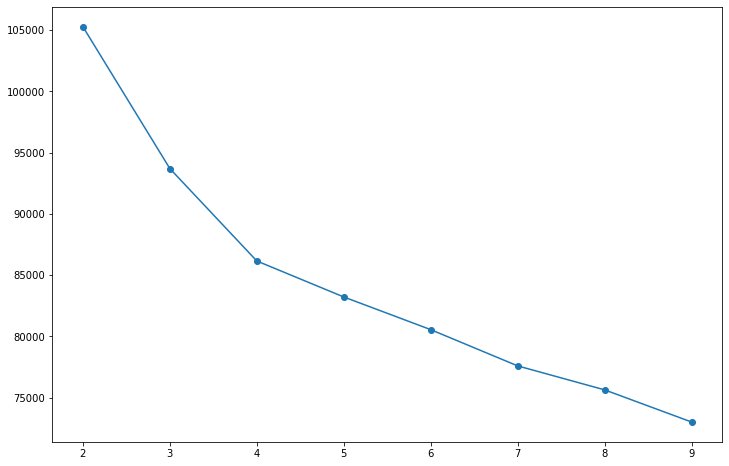

In [169]:
inertias = [KMeans(k).fit(scaled_data).inertia_ for k in range(2,10)]
plt.plot(range(2,10), inertias, marker='o')

In [170]:
cl = KMeans(4)

In [171]:
cl.fit(scaled_data)

KMeans(n_clusters=4)

In [172]:
df['Labels'] = cl.fit(scaled_data).labels_

In [160]:
X.applymap(float)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
2,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
3,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
4,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
5,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,1.0
9997,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,1.0
9998,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,0.0,0.0,0.0


## PCA

In [130]:
from sklearn import decomposition

In [164]:
pca = decomposition.PCA()

In [165]:
# pca.fit(X.applymap(float))

pca.fit(X)

PCA()

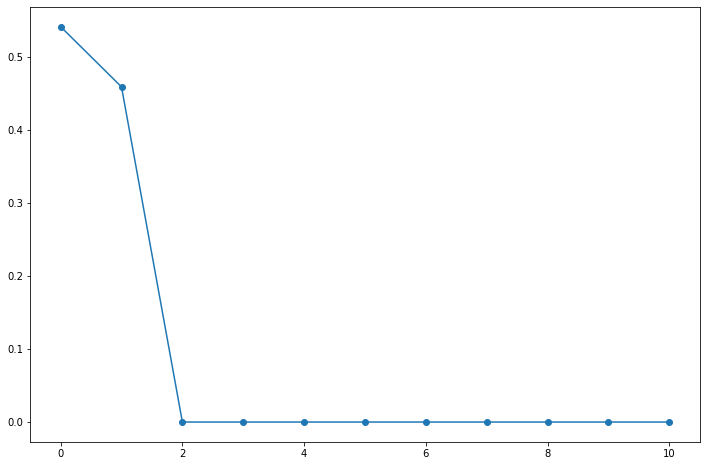

In [166]:
plt.plot(pca.explained_variance_ratio_, marker='o')

In [134]:
pc = pca.transform(X)

In [242]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [186]:
test

,t1,t2,lb
0,-76157.145973,-7194.761636,0
1,8266.910411,-11846.105622,3
2,83998.633341,-7340.133438,0
3,-76741.325979,304.770461,2
4,47245.526438,24749.993709,3
...,...,...,...
9995,-76551.522568,-2131.858088,2
9996,-18933.550268,-3089.246949,0
9997,-80759.555121,51889.555927,0
9998,-1965.606231,7070.424053,1


## Visualización clusters

<AxesSubplot:xlabel='t1', ylabel='t2'>

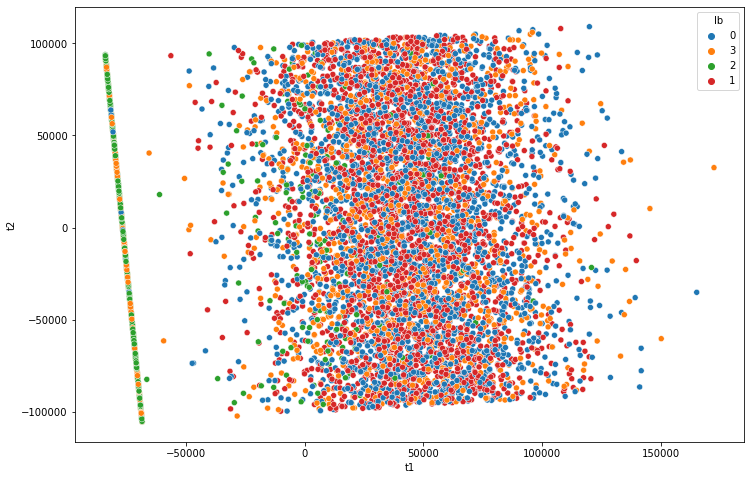

In [188]:
# Creamos un df 'test' para visualizar los datos de la transformada con las columnas

test = pd.DataFrame(pc[:,:2], columns=['t1', 't2'])
test['lb'] = df['Labels'].apply(lambda x: str(x))
sns.scatterplot(data=test, x='t1', y='t2', hue='lb')

In [112]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited,Labels
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0,1,2
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1,2
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,3
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0


In [240]:
df.groupby('Labels').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
Labels,,,,,,,,,,,,
0,649.781627,39.115964,4.929970,111800.996713,1.200678,0.698795,0.495858,100606.267624,0.0,0.000000,0.554593,0.242470
1,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,1.0,0.000000,0.524512,0.324432
2,649.477321,37.836371,5.088597,6099.632141,1.903773,0.715557,0.540483,99096.274752,0.0,0.000424,0.542603,0.070793
3,651.394992,38.886511,5.032310,61843.114705,1.538368,0.694669,0.529483,99446.862355,0.0,1.000000,0.560582,0.166397


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

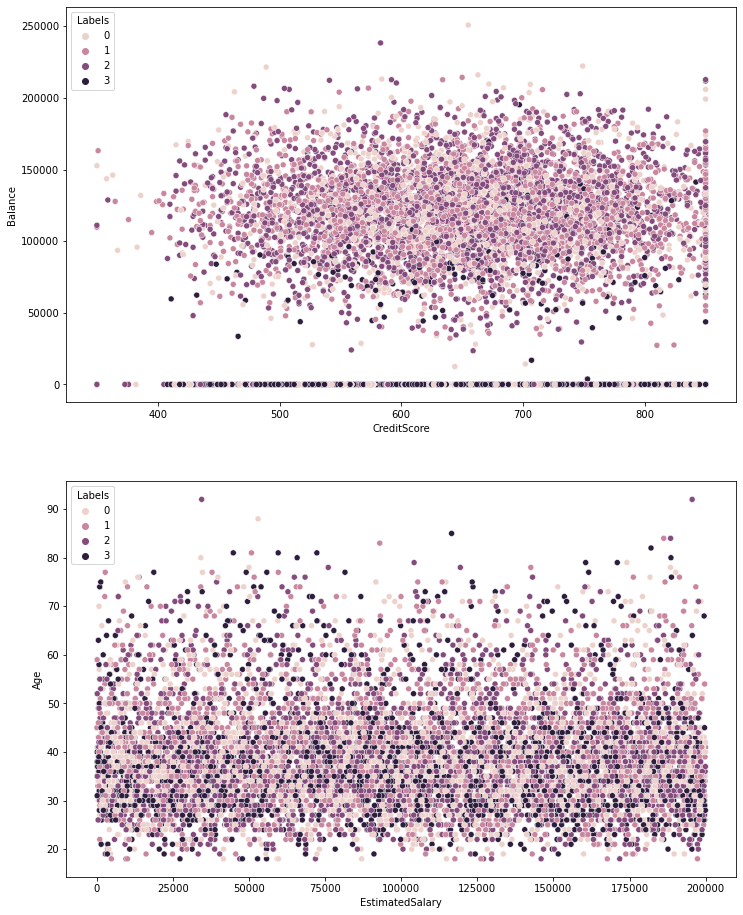

In [113]:
fig, ax = plt.subplots(2, figsize=(12,16))
sns.scatterplot(data=df, x='CreditScore', y='Balance', hue='Labels', ax=ax[0])
sns.scatterplot(data=df, x='EstimatedSalary', y='Age', hue='Labels', ax=ax[1])

## DUDAS CLUSTERING